# LSTM

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import keras
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [ ]:
df = pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


In [ ]:
df_log = np.log(df['Close'])

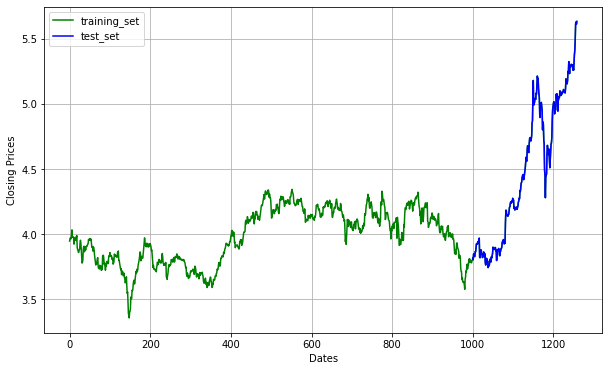

In [ ]:
train_data, test_data = df_log[:1000], df_log[1000:]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='training_set')
plt.plot(test_data, 'blue', label='test_set')
plt.legend()

In [ ]:
# Feature Scaling
training_set = np.log(df.iloc[:1000, 1:2].values)
test_set = np.log(df.iloc[1000:, 1:2].values)
t = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = t.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
Y_train = []
for i in range(60, 1000):
    X_train.append(training_set_scaled[i-60:i, 0])
    Y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [ ]:
model = keras.models.Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(keras.layers.LSTM(units = 150, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(keras.layers.Dropout(0.25))
# Adding a second LSTM layer and some Dropout regularisation
model.add(keras.layers.LSTM(units = 150, return_sequences = True))
model.add(keras.layers.Dropout(0.25))
# Adding a third LSTM layer and some Dropout regularisation
model.add(keras.layers.LSTM(units = 150, return_sequences = True))
model.add(keras.layers.Dropout(0.25))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(keras.layers.LSTM(units = 150))
model.add(keras.layers.Dropout(0.25))
# Adding the output layer
model.add(keras.layers.Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, Y_train, epochs = 300, batch_size = 100)

Epoch 1/300
10/10 [==============================] - 34s 28ms/step - loss: 0.2716
Epoch 2/300
10/10 [==============================] - 0s 27ms/step - loss: 0.1034
Epoch 3/300
10/10 [==============================] - 0s 26ms/step - loss: 0.0299
Epoch 4/300
10/10 [==============================] - 0s 27ms/step - loss: 0.0229
Epoch 5/300
10/10 [==============================] - 0s 27ms/step - loss: 0.0163
Epoch 6/300
10/10 [==============================] - 0s 27ms/step - loss: 0.0146
Epoch 7/300
10/10 [==============================] - 0s 26ms/step - loss: 0.0120
Epoch 8/300
10/10 [==============================] - 0s 26ms/step - loss: 0.0102
Epoch 9/300
10/10 [==============================] - 0s 27ms/step - loss: 0.0101
Epoch 10/300
10/10 [==============================] - 0s 26ms/step - loss: 0.0093
Epoch 11/300
10/10 [==============================] - 0s 27ms/step - loss: 0.0089
Epoch 12/300
10/10 [==============================] - 0s 26ms/step - loss: 0.0084
Epoch 13/300
10/10 [====

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = np.log(df.iloc[:1000, 1:2])
dataset_test = np.log(df.iloc[1000:, 1:2])
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = t.transform(inputs)
X_test = []
for i in range(60, 319):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(259, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = t.inverse_transform(predicted_stock_price)

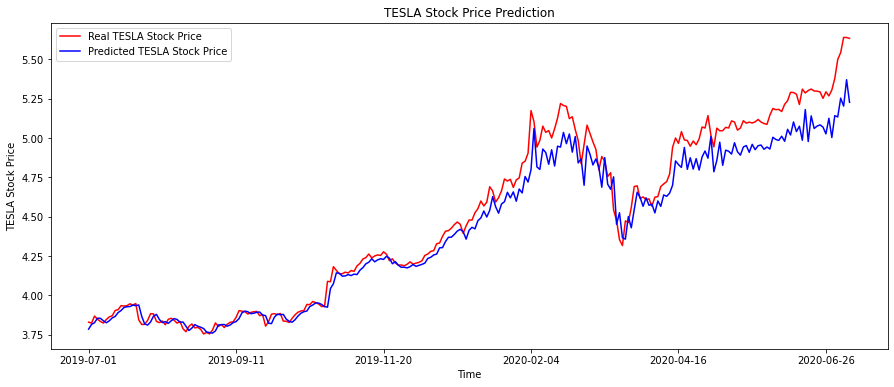

In [ ]:
# Visualising the results
plt.figure(figsize=(15,6))
plt.plot(df.loc[1000:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[1000:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
#plt.figure(figsize=(20,6))
plt.xticks(np.arange(0,259,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [ ]:
Real = df.loc[1000:, 'Date'],dataset_test.values
Predicted = df.loc[1000:, 'Date'],predicted_stock_price
y_real = np.array(Real[1])
y_pred = np.array(Predicted[1])
def mape(y_real, y_pred):
    return np.mean(np.abs((y_pred - y_real) / y_real)) * 100

def smape(y_real, y_pred):
    return 2.0 * np.mean(np.abs(y_pred - y_real) / (np.abs(y_pred) + np.abs(y_real))) * 100

# MSE
MSE = metrics.mean_squared_error(y_real, y_pred)
print('MSE: '+str(MSE)) 
# RMSE
RMSE = np.sqrt(metrics.mean_squared_error(y_real, y_pred))
print('RSME: '+str(RMSE)) 
# MAE
MAE = metrics.mean_absolute_error(y_real, y_pred)
print('MAE: '+str(MAE)) 
# MAPE
MAPE = mape(y_real, y_pred)
print('MAPE:'+str(MAPE)) 

MSE: 0.01564772729562196
RSME: 0.12509087614859032
MAE: 0.08842283332420983
MAPE:1.8107169950389
